## <span style="color : green"> Implementing Regression Models </span>

# <center> Table of Contents </center>

1. Computing $b0$ and $b1$ in the simple linear equation and predict the $Ypred$
1. Compute the intercepts and coefficients of independent variable in MLP and predict the $Ypred$
2. Plot the regression line 
1. Evaluate the model using Mean Squared Error, R-Squared score
1. Train a logistic model and evaluate using recall, precision, accuracy and confusion matrix

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, \
        recall_score, precision_score, accuracy_score, \
        confusion_matrix, f1_score

In [5]:
df = pd.read_csv('../Datasets/Prostate_Cancer.csv', index_col=0)
df.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,B,9,13,133,1326,0.143,0.079,0.181,0.057
3,M,21,27,130,1203,0.125,0.160,0.207,0.060
4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,M,9,19,135,1297,0.141,0.133,0.181,0.059


### Single Linear Regression 

In [49]:
x = df['radius'].values
y = df['diagnosis_result']

encoder = LabelEncoder()
labels = encoder.fit_transform(y)

xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.2, random_state=0)

In [50]:
model = LinearRegression()
model.fit(xtrain.reshape(-1,1), ytrain)


LinearRegression()

In [51]:
# Intercept

print(f'b0 (intercept)- {model.intercept_} ')

b0 (intercept)- 0.9186344164664089 


In [52]:
# Co-efficient

print(f'b1 (Co-efficient)- {model.coef_[0]} ')

b1 (Co-efficient)- -0.02076585518754571 


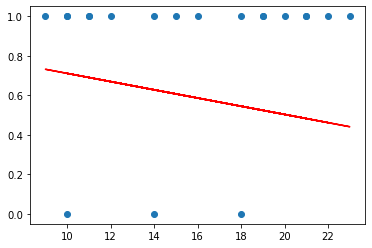

In [57]:
# Regression Line 
ypred = model.predict(xtest.reshape(-1,1))

plt.scatter(xtest, ytest)
plt.plot(xtest, ypred, c='r')
plt.show()

In [64]:
mse = mean_squared_error(ytest, ypred)
mse

0.2122606845136341

In [65]:
rsquared = r2_score(ytest, ypred)
rsquared

-0.6647896824598756

### Logistic Regression

In [67]:
model = LogisticRegression()
model.fit(xtrain.reshape(-1,1), ytrain)


LogisticRegression()

In [68]:
# Intercept

print(f'b0 (intercept)- {model.intercept_} ')

b0 (intercept)- [1.75061574] 


In [70]:
# Co-efficient

print(f'b1 (Co-efficient)- {model.coef_} ')

b1 (Co-efficient)- [[-0.08674008]] 


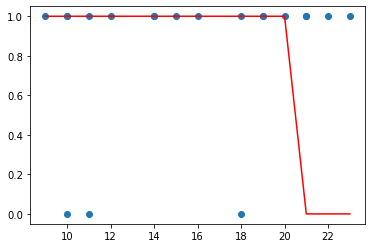

In [89]:
# Classification Line 

x = np.sort(xtest.reshape(-1,1), axis=0)
ypred = model.predict(x)


plt.scatter(x, ytest)
plt.plot(x, ypred, color='red')
plt.show()




In [98]:
accuracy_score(ytest, ypred)

0.65

In [96]:
recall_score(ytest, ypred)

0.7647058823529411

In [97]:
precision_score(ytest, ypred)

0.8125

In [100]:
print(f1_score(ytest, ypred))

0.787878787878788


In [101]:
print(confusion_matrix(ytest, ypred))

[[ 0  3]
 [ 4 13]]


## Multiple Linear Regression 

In [105]:
df.columns

Index(['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [107]:
x = df[['radius', 'texture']].values
y = df['diagnosis_result']

encoder = LabelEncoder()
labels = encoder.fit_transform(y)

xtrain, xtest, ytrain, ytest = train_test_split(x, labels, test_size=0.2, random_state=0)

In [109]:
model = LinearRegression()
model.fit(xtrain, ytrain)


LinearRegression()

In [111]:
# Intercept

print(f'b0 (intercept) : {model.intercept_} ')

b0 (intercept) : 1.1169873972460809 


In [112]:
# Co-efficient

print(f'b1 (Co-efficient) : {model.coef_} ')

b1 (Co-efficient) : [-0.03014932 -0.00242113] 


In [115]:
mse = mean_squared_error(ytest, ypred)
mse

0.18256686187853127

In [116]:
rsquared = r2_score(ytest, ypred)
rsquared

-0.4318969559100494